In [4]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def merge_csv_files(folder_path):
    # Get list of CSV files in the folder
    csv_files = [file for file in os.listdir(folder_path) if file.endswith('.csv')]
    
    # Sort files based on numerical prefix
    csv_files.sort(key=lambda x: int(x.split('.')[0]))
    
    # Initialize an empty DataFrame to store the merged data
    merged_df = pd.DataFrame()
    
    # Iterate through each CSV file, read it into a DataFrame, add 'report_id' column,
    # extract hour and minute from 'DateTimeFrom', and merge with the main DataFrame
    for i, file in enumerate(csv_files, start=1):
        file_path = os.path.join(folder_path, file)
        df = pd.read_csv(file_path, sep=';')
        df['report_id'] = i
        
        # Extract hour and minute from 'DateTimeFrom'
        df['Time'] = df['DateTimeFrom'].str[11:16]
        
        # Convert 'Time' column to datetime format
        df['Time'] = pd.to_datetime(df['Time'], format='%H:%M')
        
        merged_df = pd.concat([merged_df, df], ignore_index=True)
    
    return merged_df


# Example usage
folder_path = "C:\\Users\\lopjua01\\Desktop\\VS Code\\Händelser\\2024-05-29 Brand i Södra Länken"
merged_dataframe = merge_csv_files(folder_path)
merged_dataframe.head()


,TravelTimeRouteId,TravelTimeRouteVersionId,Description,DateTimeFrom,AverageSpeedKmph,AverageTravelTimeInMinutes,AverageTravelTimeInSeconds,AvgNormalTravelTimeInSeconds,AverageNormalDelayInSeconds,SumNormalFlow,Textbox19,TotalCost_Aadt,Aadt,RouteOwner,ValidFrom,ValidTo,SortId,report_id,Time
0,20779,20779,E4/E20 S Trafikplats Karlberg (163),2024-05-29 09:00:00,"69,16","0,23","13,98","13,35","0,63","34,14","21,51",6.0,37023.0,T.Nu,2015-06-26 00:00:00,9999-12-31 00:00:00,1,1,1900-01-01 09:00:00
1,20779,20779,E4/E20 S Trafikplats Karlberg (163),2024-05-29 09:01:00,"68,98","0,23","14,02","13,27","0,75","34,14","25,61",7.0,37023.0,T.Nu,2015-06-26 00:00:00,9999-12-31 00:00:00,1,1,1900-01-01 09:01:00
2,20779,20779,E4/E20 S Trafikplats Karlberg (163),2024-05-29 09:02:00,"68,98","0,23","14,02","13,35","0,67","34,14","22,87",6.0,37023.0,T.Nu,2015-06-26 00:00:00,9999-12-31 00:00:00,1,1,1900-01-01 09:02:00
3,20779,20779,E4/E20 S Trafikplats Karlberg (163),2024-05-29 09:03:00,"68,85","0,23","14,05","13,46","0,59","34,14","20,14",6.0,37023.0,T.Nu,2015-06-26 00:00:00,9999-12-31 00:00:00,1,1,1900-01-01 09:03:00
4,20779,20779,E4/E20 S Trafikplats Karlberg (163),2024-05-29 09:04:00,"67,05","0,24","14,42","13,42",1,"34,14","34,14",9.0,37023.0,T.Nu,2015-06-26 00:00:00,9999-12-31 00:00:00,1,1,1900-01-01 09:04:00


<Figure size 2500x1200 with 0 Axes>

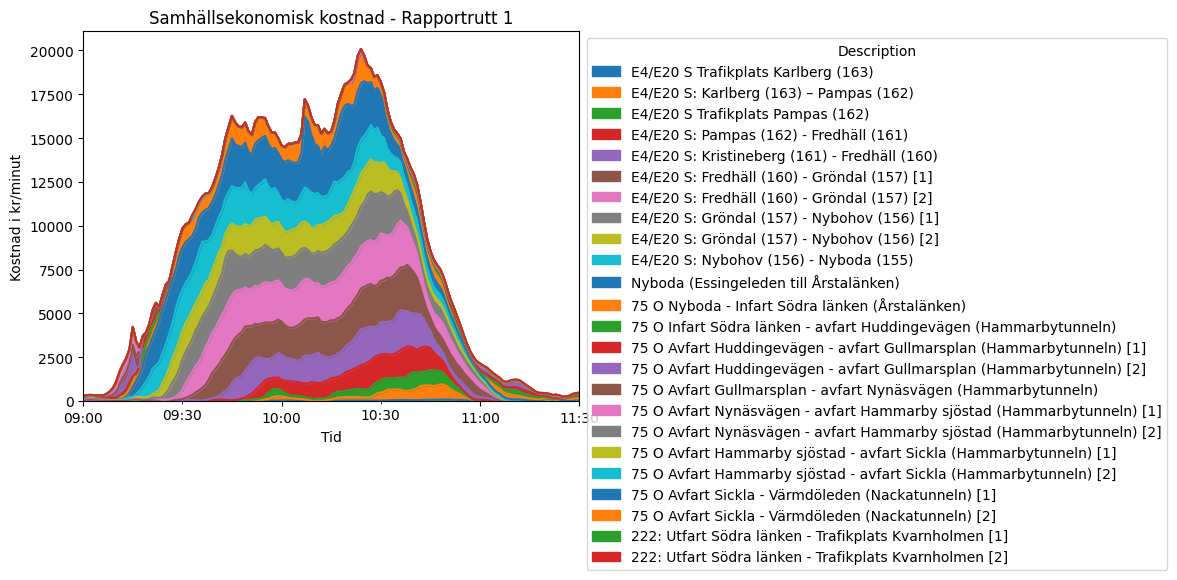

<Figure size 2500x1200 with 0 Axes>

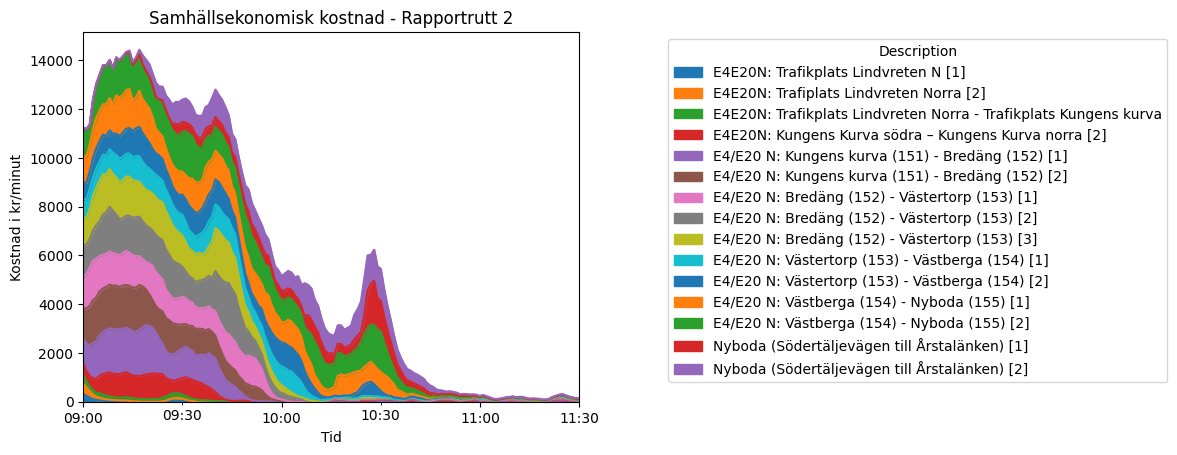

<Figure size 2500x1200 with 0 Axes>

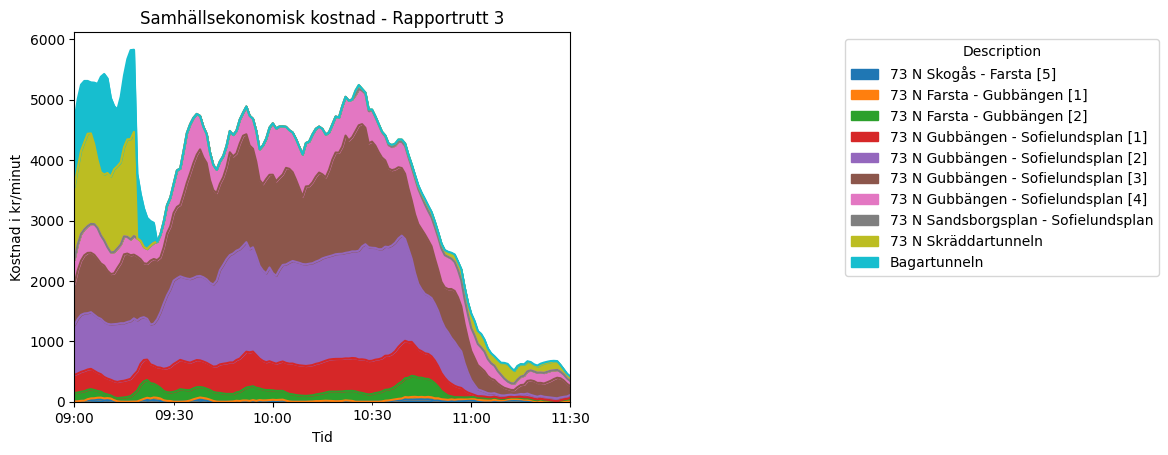

<Figure size 2500x1200 with 0 Axes>

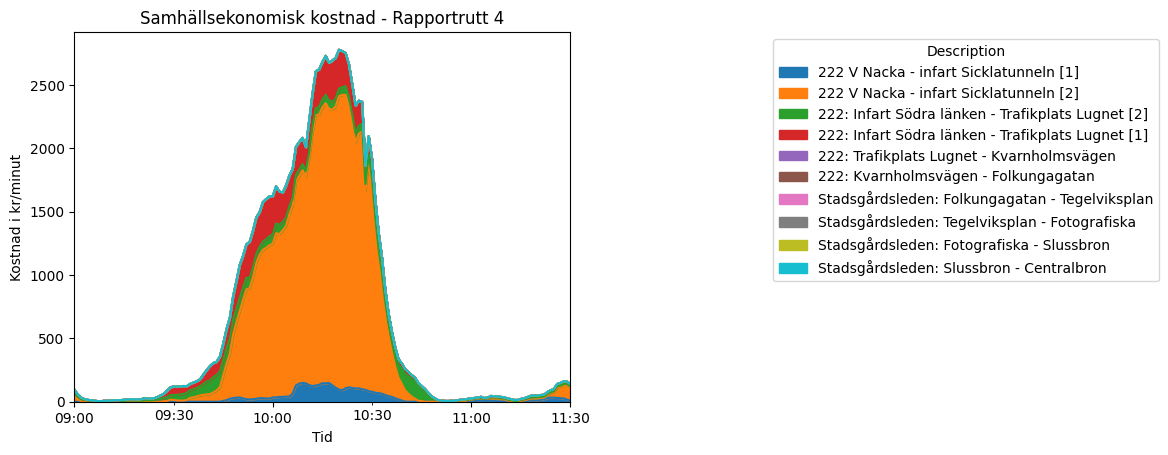

<Figure size 2500x1200 with 0 Axes>

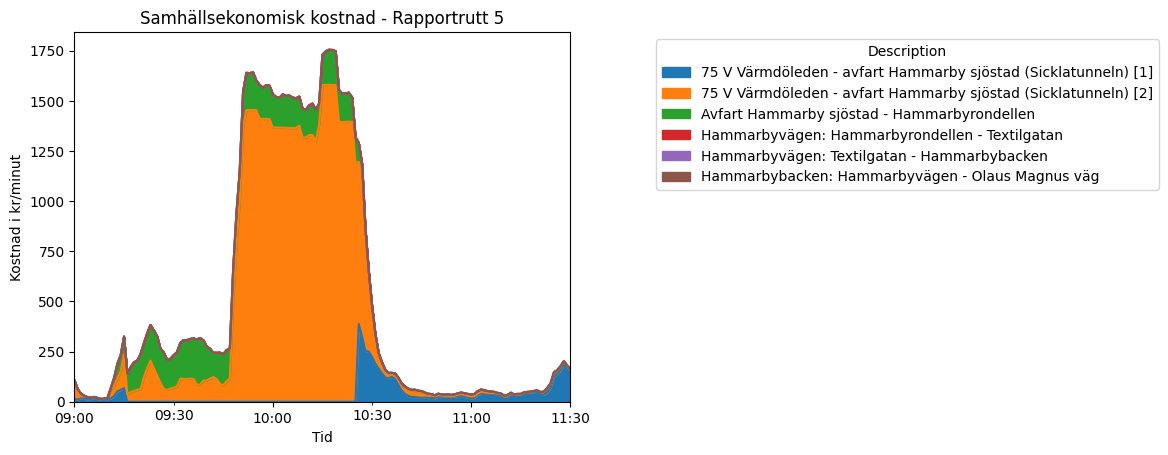

<Figure size 2500x1200 with 0 Axes>

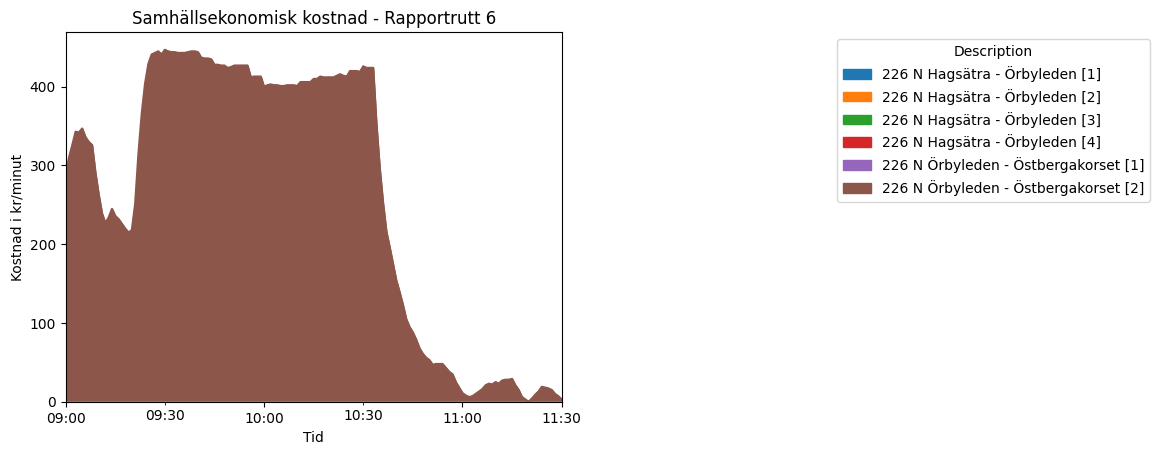

<Figure size 2500x1200 with 0 Axes>

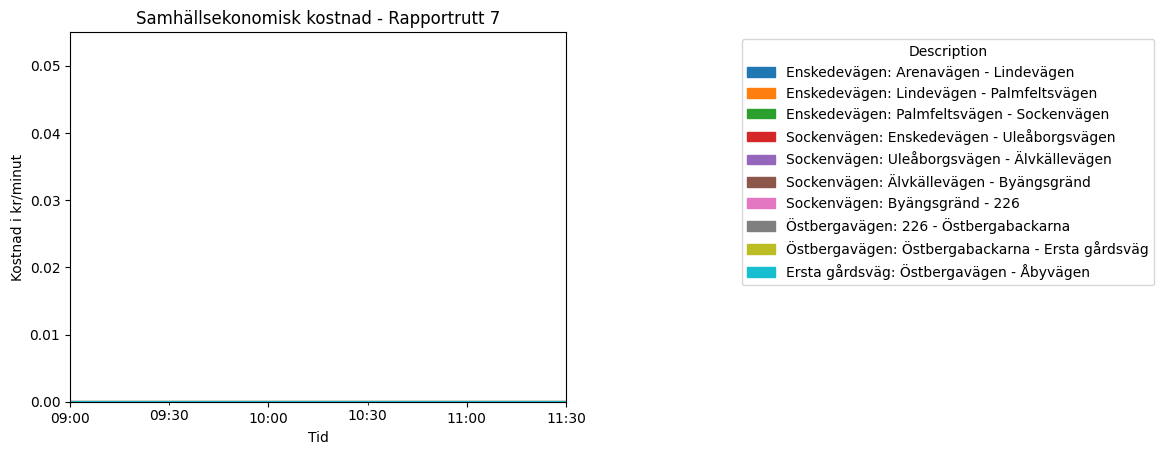

In [2]:
import matplotlib.pyplot as plt
import pandas as pd

def stacked_area_diagram(merged_dataframe):
    # Group the DataFrame by 'report_id'
    grouped_df = merged_dataframe.groupby('report_id')
    
    # Iterate through each group and create a separate plot for each report_id
    for report_id, group in grouped_df:
        # Group by 'Time' and 'SortId' and sum 'TotalCost_Aadt' for each minute
        stacked_data = group.groupby(['Time', 'SortId'])['TotalCost_Aadt'].sum().unstack(fill_value=0)
        
        # Convert index to datetime for correct plotting
        stacked_data.index = pd.to_datetime(stacked_data.index)
        
        # Create a new figure for each group
        plt.figure(figsize=(25, 12))
        
        # Plot stacked area
        ax = stacked_data.plot.area(stacked=True, title=f'Samhällsekonomisk kostnad - Rapportrutt {report_id}')
        
        # Get unique descriptions for the current report_id
        unique_description = group[['SortId', 'Description']].drop_duplicates().sort_values('SortId')
        sort_ids = unique_description['SortId'].tolist()
        descriptions = unique_description['Description'].tolist()

        # Add labels and legend
        plt.xlabel('Tid')
        plt.ylabel('Kostnad i kr/minut')
        handles, _ = ax.get_legend_handles_labels()
        ax.legend(handles, descriptions, title='Description', loc='upper right',  bbox_to_anchor=(1.7, 0.5, 0.5, 0.5))
        
        # Rotate x-axis labels by 90 degrees counter-clockwise
        plt.xticks()
        
        # Show the plot
        plt.show()

# Example usage
stacked_area_diagram(merged_dataframe)





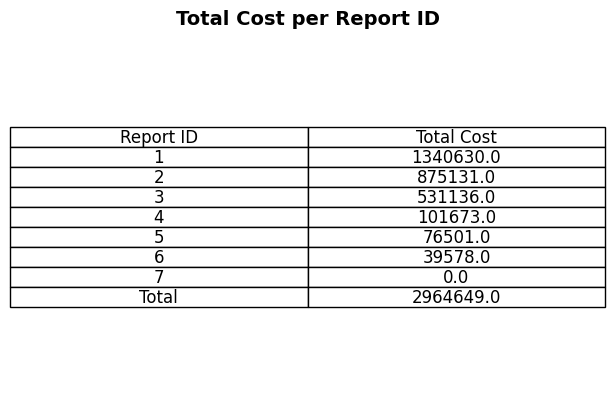

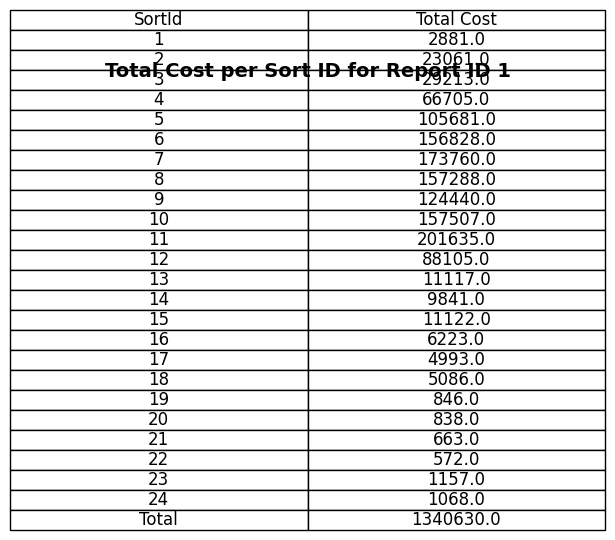

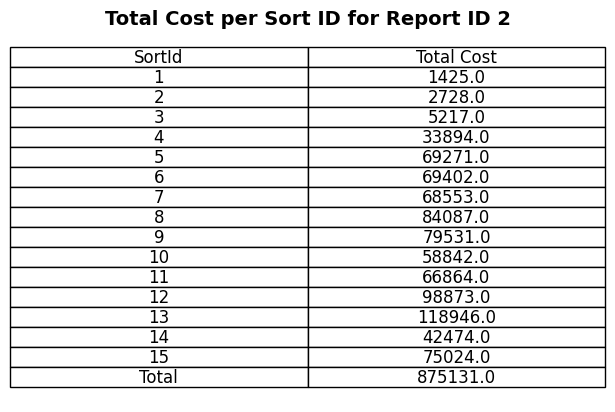

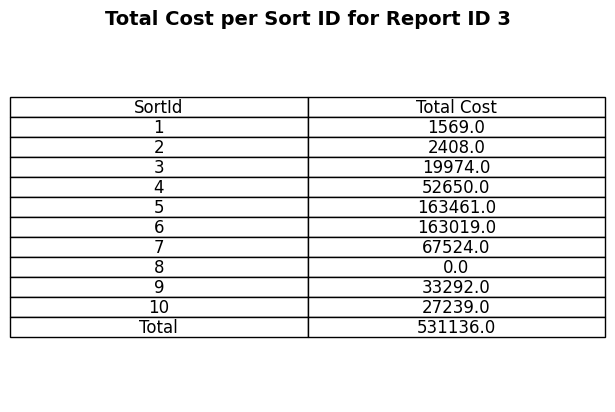

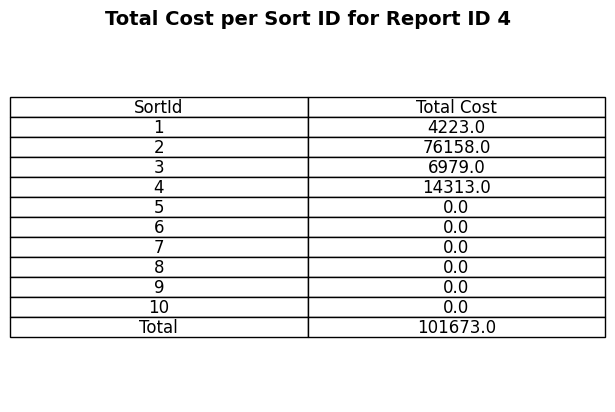

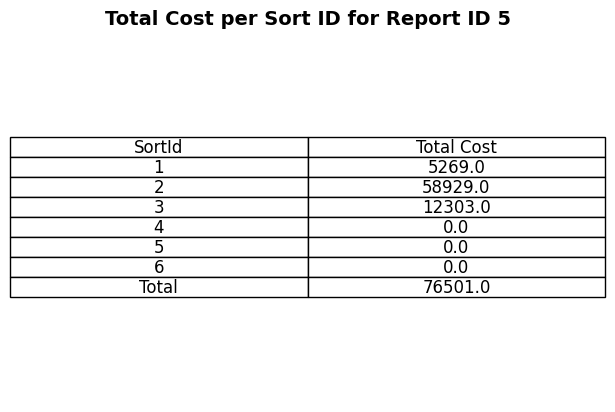

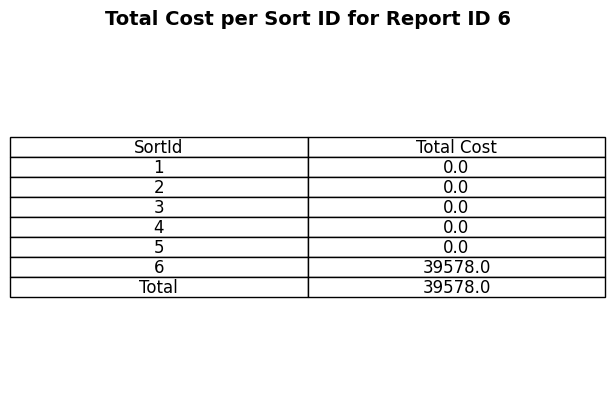

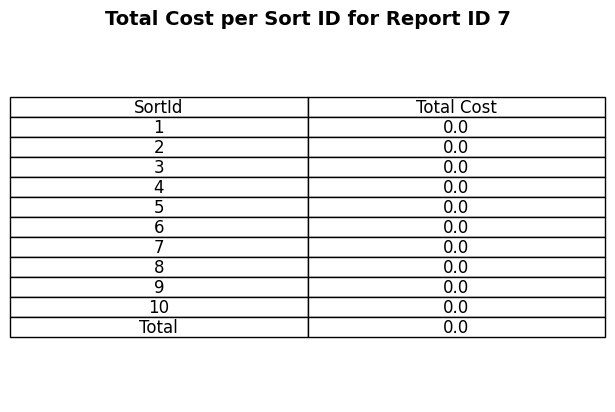

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

def plot_table(dataframe, title):
    # Add a 'Total' row
    total_row = dataframe.sum(numeric_only=True).to_frame().T
    total_row[dataframe.columns[0]] = 'Total'
    dataframe = pd.concat([dataframe, total_row], ignore_index=True)

    fig, ax = plt.subplots()
    ax.axis('tight')
    ax.axis('off')
    table = ax.table(cellText=dataframe.values, colLabels=dataframe.columns, cellLoc='center', loc='center')

    table.auto_set_font_size(False)
    table.set_fontsize(12)
    table.scale(1.2, 1.2)

    ax.set_title(title, fontsize=14, fontweight='bold')

    plt.show()

def summary(merged_dataframe):
    # Summary table 1: Total cost per report_id
    total_cost_per_report = merged_dataframe.groupby('report_id')['TotalCost_Aadt'].sum().reset_index()
    total_cost_per_report.columns = ['Report ID', 'Total Cost']
    
    summary_tables = {
        'Total Cost per Report ID': total_cost_per_report
    }
    
    # Summary table 2: Total cost per SortId for each report_id
    report_ids = merged_dataframe['report_id'].unique()
    for report_id in report_ids:
        total_cost_per_sortid = merged_dataframe[merged_dataframe['report_id'] == report_id].groupby('SortId')['TotalCost_Aadt'].sum().reset_index()
        total_cost_per_sortid.columns = ['SortId', 'Total Cost']
        summary_tables[f'Total Cost per Sort ID for Report ID {report_id}'] = total_cost_per_sortid
    
    # Plot each summary table using matplotlib
    for title, table in summary_tables.items():
        plot_table(table, title)
    
    return summary_tables

# Example usage
summary_tables = summary(merged_dataframe)


In [17]:
df_talltunneln_stängd = pd.read_csv("C:/Users/lopjua01/Downloads/SL_Test/Talltunneln_stängd.csv")
#df_talltunneln_stängd = pd.read_csv("C://Users//lopjua01//Downloads//SL test//Talltunneln_stängd.csv")

In [18]:
df_talltunneln_stängd.head()

,,,,,,,,Talltunneln_stängd
Händelseid,Månad namn NTS skapad,Timme Nts Skapad,Händelse text,Månad nummer NTS skapad,Komponent,Åtgärdsplan Startad,Återställning startad,Antal bom stängda minuter - oplanerat avstängt
2024-01-05/14:27:27-1/1,Januari,14,Långsam kö,1,Väg 226V Bom Talltunneln inf AB+25314,2:28:53 PM,2:44:22 PM,15
2024-01-09/08:24:55-1/1,Januari,8,Långsam kö,1,Väg 226V Bom Talltunneln inf AB+25314,8:26:58 AM,8:34:32 AM,7
2024-01-09/10:54:04-1/1,Januari,10,Brand i fordon,1,Väg 226V Bom Talltunneln inf AB+25314,10:54:42 AM,2:40:46 PM,229
2024-01-11/08:48:44-1/1,Januari,8,Långsam kö,1,Väg 226V Bom Talltunneln inf AB+25314,8:49:08 AM,9:08:05 AM,18
